In [1]:
import random
import copy
import math
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# a class deined for matrix operations
class List:
    """
    A custom class defined for matrix operations
    """

    def __getShape(self):
        return (len(self.list), len(self.list[0]))
    
    def __transpose(self):
        t = [[self.list[j][i] for j in range(len(self.list))] for i in range(len(self.list[0]))]
        return List(t)
    
    shape = property(fget=__getShape)
    T = property(fget=__transpose)
    
    def __init__(self, l):
        self.list = l if not isinstance(l, List) else List(l)
        
    def __str__(self):
        return 'List({})'.format(self.list)
    
    def __repr__(self):
        return 'List({})'.format(self.list)
    
    def __add__(self, other):
        if isinstance(other, self.__class__):
            assert self.shape == other.shape, 'Lists are not of same shape - Shape({}, {}) != Shape({}, {})'.format(self.shape[0], self.shape[1], other.shape[0], other.shape[1])
            return List([[self.list[i][j] + other.list[i][j] for j in range(len(self.list[0]))] for i in range(len(self.list))])
        else:
            return List([[other + self.list[i][j] for j in range(len(self.list[0]))] for i in range(len(self.list))])
    
    def __radd__(self, other):
        return self.__add__(other)
    
    def __sub__(self, other):
        if isinstance(other, self.__class__):
            assert self.shape == other.shape, 'Lists are not of same shape - Shape({}, {}) != Shape({}, {})'.format(self.shape[0], self.shape[1], other.shape[0], other.shape[1])
            return List([[self.list[i][j] - other.list[i][j] for j in range(len(self.list[0]))] for i in range(len(self.list))])
        else:
            return List([[other - self.list[i][j] for j in range(len(self.list[0]))] for i in range(len(self.list))])
    
    def __rsub__(self, other):
        return self.__sub__(other)
    
    def __mul__(self, other):
        if isinstance(other, self.__class__):
            assert self.shape[1] == other.shape[0], 'dim1({0}) != dim0({1})'.format(self.shape[1], other.shape[0]) # checking dimensions
            product = [[0 for i in range(len(other.list[0]))] for j in range(len(self.list))]

            for i in range(len(self.list)):
                for j in range(len(other.list[0])):
                    for k in range(len(other.list)):
                        product[i][j] += (self.list[i][k] * other.list[k][j])

            return List(product)
        else:
            new_list = [[other * self.list[i][j] for j in range(len(self.list[0]))] for i in range(len(self.list))]
            return List(new_list)
    
    def __rmul__(self, other):
        return self.__mul__(other)
    
    def __truediv__(self, other):
        #assert not isinstance(other, self.__class__), 'Cannot divide two matrices'
        if not isinstance(other, self.__class__):
            new_list = [[self.list[i][j] / other for j in range(len(self.list[0]))] for i in range(len(self.list))]
            return List(new_list)
        else:
            return List([[self.list[i][j] / other.list[i][j] for j in range(len(self.list[0]))] for i in range(len(self.list))])
    
    def __rtruediv__(self, other):
        assert not isinstance(other, self.__class__), 'Cannot divide two matrices'
        new_list = [[other / self.list[i][j] for j in range(len(self.list[0]))] for i in range(len(self.list))]
        return List(new_list)
    
    def __abs__(self):
        assert self.shape[1] == 1, 'dim1({}) != 1'.format(self.shape[1])
        horiz = self.T.list[0]
        norm = sum(list(map(lambda x: x ** 2, horiz)))
        return norm ** 0.5
    
    def __eq__(self, other):
        assert self.shape == other.shape, 'Lists are not of same shape - Shape({}, {}) != Shape({}, {})'.format(self.shape[0], self.shape[1], other.shape[0], other.shape[1])
        res = True
        for i in range(len(self.list)):
            for j in range(len(self.list[0])):
                res = res and (self.list[i][j] == other[i][j])
        
        return res
    
    def __pow__(self, other):
        assert not isinstance(other, self.__class__), 'Cannot perform required operation with two matrices'
        res_list = [[self.list[i][j] ** other for j in range(len(self.list[0]))] for i in range(len(self.list))]
        return List(res_list)
    
    def __rpow__(self, other):
        assert not isinstance(other, List)
        res_list = [[other ** self.list[i][j] for j in range(len(self.list[0]))] for i in range(len(self.list))]
        return List(res_list)
    
    def __getitem__(self, index):
        return self.list[index]
    
    @classmethod
    def log(cls, x):
        assert isinstance(x, List) and x.shape[1] == 1, 'Provide valid List objects'
        new_list = x.T.list[0]
        new_list = [[math.log(i)] for i in new_list]
        return List(new_list)
    
    @classmethod
    def exp(cls, x):
        assert isinstance(x, List) and x.shape[1] == 1, 'Provide valid List objects'
        new_list = x.T.list[0]
        new_list = [[math.exp(i)] for i in new_list]
        return List(new_list)

def ele_wise_mul(x, y):
    assert isinstance(x, List) and isinstance(y, List), 'Provide List objects'
    return List([[ele1[0] * ele2[0]] for ele1, ele2 in zip(x.list, y.list)])

a = List([[1], [4]])
b = List([[1], [4]])
a *= 2
a.shape, a.T
ele_wise_mul(a, b)

List([[2], [32]])

In [3]:
# importing the dataset
data_set = []
with open('Colon_Cancer_CNN_Features.csv', mode='r') as datafile:
    for line in datafile:
        line = line.split(',')
        line = list(map(float, line))
        line[-1] = int(line[-1])
        
        data_set.append(line)

random.shuffle(data_set)

data = [line[:-1] for line in data_set]
labels = [[line[-1]] for line in data_set]

X_train = copy.deepcopy(data[:5218])
y_train = copy.deepcopy(labels[:5218])
X_test = copy.deepcopy(data[5218:])
y_test = copy.deepcopy(labels[5218:])

# creating one hot encoded vectors
for target in range(len(y_train)):
    new_ele = [0] * 4
    new_ele[y_train[target][0] - 1] = 1
    y_train[target] = copy.deepcopy(new_ele)

for target in range(len(y_test)):
    new_ele = [0] * 4
    new_ele[y_test[target][0] - 1] = 1
    y_test[target] = copy.deepcopy(new_ele)

# convert to list objects
X_train = List(X_train) if not isinstance(X_train, List) else X_train
y_train = List(y_train) if not isinstance(y_train, List) else y_train
X_test = List(X_test) if not isinstance(X_test, List) else X_test
y_test = List(y_test) if not isinstance(y_test, List) else y_test

print(y_train.shape)
print(y_test.shape)

(5218, 4)
(1305, 4)


In [4]:
class ANN:
    """
    creates a 3-layer network(an input layer, a hidden layer, an output layer)
    """
    def __init__(self, num_hidden, loss_func, lr=0.001):
        self.lr = lr
        self.loss_func = loss_func
        
        self.weights_hi = [[round(random.random(), 2) for _ in range(326)] for _ in range(num_hidden)]
        #self.biases_hi = [[random.random()] for _ in range(num_hidden + 1)]
        
        self.weights_oh = [[round(random.random(), 2) for _ in range(num_hidden + 1)] for _ in range(4)]
        #self.biases_oh = [[random.random()] for _ in range(4)]
        
        self.weights_hi = List(self.weights_hi) if not isinstance(self.weights_hi, List) else self.weights_hi
        self.weights_oh = List(self.weights_oh) if not isinstance(self.weights_oh, List) else self.weights_oh
        #self.biases_hi = List(self.biases_hi) if not isinstance(self.biases_hi, List) else self.biases_hi
        #self.biases_oh = List(self.biases_oh) if not isinstance(self.biases_oh, List) else self.biases_oh
    
    @classmethod
    def sigmoid(cls, x):
        expo = List.exp(-1 * x / 100)
        denom = 1 + expo
        return 1.0 / (100 * denom)
    
    @classmethod
    def sigmoid_prime(cls, x):
        return ele_wise_mul(ANN.sigmoid(x), 1 - ANN.sigmoid(x))
    
    def ssd(self, x, y):
        output, _ = self.__forward_prop(x)
        return abs(y.T - output) ** 2
    
    def entropy(self, x, y):
        output, _ = self.__forward_prop(x)
        loss_vec = (-1 * ele_wise_mul(y.T, List.log(output))).T.list[0]
        return sum(loss_vec)
    
    def loss_prime(self, x, y):
        output, _ = self.__forward_prop(x)
        if self.loss_func == 'ssd':
            return -1 * (y.T - output)
        else:
            return -1 * (y.T / output)

    def single_loss(self, x, y):
        if self.loss_func == 'ssd':
            #print('ssd')
            return self.ssd(x, y)
        else:
            #print('entropy')
            return self.entropy(x, y)
    
    def batch_loss(self, x, y):
        total = 0
        for example, label in zip(x.list, y.list):
            total += self.single_loss(List([example]), List([label]))
        
        loss = total / (x.shape[0])
        return loss
    
    def single_acc(self, x, y):
        output, _ = self.__forward_prop(x)
        return y.T == output
    
    def batch_acc(self, x, y):
        total = 0
        for example, label in zip(x.list, y.list):
            total += self.single_acc(List([example]), List([label]))
        
        acc = total / (x.shape[0])
        return acc
    
    def __forward_prop(self, x):
        x = List([[1] + x.list[0]]).T
        hidden_inputs = self.weights_hi * x
        hidden_values = ANN.sigmoid(hidden_inputs).T
        
        hidden_values = List([[1] + hidden_values.list[0]]).T
        output_inputs = self.weights_oh * hidden_values
        output_values = ANN.sigmoid(output_inputs)
        ## forward prop ends here
        
        return output_values, hidden_values
    
    def __backprop(self, x, y):
        output_values, hidden_values = self.__forward_prop(x)
        
        ## back prop starts here
        loss_prime = self.loss_prime(x, y)
        d3 = -1 * (ele_wise_mul(loss_prime, ANN.sigmoid_prime(output_values)))
        dJdw2 = d3 * hidden_values.T # gradient of loss w.r.t w2
        self.weights_oh = self.weights_oh - self.lr * dJdw2 # updating w2
        
        part1 = self.weights_oh.T * d3
        part2 = ele_wise_mul(part1, ANN.sigmoid_prime(hidden_values))
        part2 = List(part2.list[1:]) # removing gradient corresponding to bias
        dJdw1 = part2 * List([[1] + x.list[0]]) # gradient of loss w.r.t w1
        self.weights_hi = self.weights_hi - self.lr * dJdw1 # updating w1
    
    def fit(self, x, y):
        for example, label in tqdm(zip(x.list, y.list)):
            #self.__forward_prop(List([example]), List([label]))
            try:
                self.__backprop(List([example]), List([label]))
            except:
                pass

In [5]:
loss_ssd = {'Train': [], 'Test': []}
loss_entropy = {'Train': [], 'Test': []}
for loss in ['entropy', 'ssd']:
    for neurons in range(5, 8):
        ann = ANN(neurons, loss)
        ann.fit(X_train, y_train)
        
        train_loss = ann.batch_loss(X_train, y_train)
        test_loss = ann.batch_loss(X_test, y_test)
        print(train_loss)
        print(test_loss)
        
        if loss == 'ssd':
            loss_ssd['Train'].append(train_loss)
            loss_ssd['Test'].append(test_loss)
        else:
            loss_entropy['Train'].append(train_loss)
            loss_entropy['Test'].append(test_loss)

5218it [00:37, 138.58it/s]


5.304250844133033
5.3042226780144714


5218it [00:37, 139.54it/s]


5.305415112896937
5.305436125974665


5218it [00:29, 178.94it/s]


5.30326616568927
5.303220556313642


5218it [00:23, 217.94it/s]


0.9900753964393538
0.9900756672727289


5218it [00:25, 202.69it/s]


0.9900836313948373
0.9900840722741198


5218it [00:29, 175.50it/s]


0.9900779778011872
0.9900776590336162


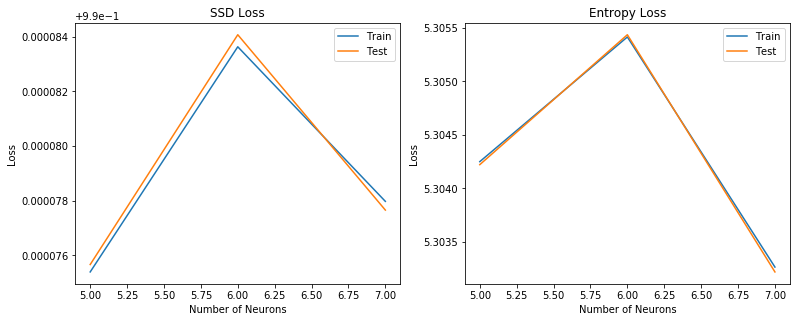

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12.8, 4.8))

ax[0].plot(range(5, 8), loss_ssd['Train'], label='Train')
ax[0].plot(range(5, 8), loss_ssd['Test'], label='Test')
ax[0].set_title('SSD Loss')
ax[0].set_xlabel('Number of Neurons')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(range(5, 8), loss_entropy['Train'], label='Train')
ax[1].plot(range(5, 8), loss_entropy['Test'], label='Test')
ax[1].set_title('Entropy Loss')
ax[1].set_xlabel('Number of Neurons')
ax[1].set_ylabel('Loss')
ax[1].legend()

In [7]:
print(loss_ssd)

{'Train': [0.9900753964393538, 0.9900836313948373, 0.9900779778011872], 'Test': [0.9900756672727289, 0.9900840722741198, 0.9900776590336162]}


In [8]:
print(loss_entropy)

{'Train': [5.304250844133033, 5.305415112896937, 5.30326616568927], 'Test': [5.3042226780144714, 5.305436125974665, 5.303220556313642]}
